# Projeto Ciência de Dados - Previsão de Ciclos Paleoecologicos

- Nosso desafio é conseguir prever os ciclos paleoecologicos presente na amostragem de dados

- Base de Dados:

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento dos Dados
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

### materiais e metodos

- 

# Projeto Ciência de Dados - Previsão de ciclos paleoecologicos

- Nosso desafio é conseguir prever os ciclos com relação do comportamento dos dados em detrimento da distribuição numerica de fosseies e materia organica presentes na amostragem do folhelho lontas
- MOB, Espessura, Paleo, Geoquimica
- Modelo de previzão usando scikit-learn

#### Importar a Base de dados

In [1]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [45]:
import pandas as pd

dados = pd.read_csv('dados.csv', sep = ';')
tabela = pd.read_csv('tabela.csv', sep = ';')

display(dados)
display(tabela)

,N�vel,Espessura,TOC(%),TN(%),C/N(%),??13C (�),??15N (�),TS [wt%],U?auth [ppm],U/Th,...,Cu?(EF),Pb?(EF),Zn(EF),Ni?(EF),Cr?(EF),P?(EF),Si?(EF),Ti?(EF),K?(EF),Fe?(EF
0,4D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4A,10,"11,36","0,43","26,42","-26,2","9,1","4,54","18,87","2,06",...,"2,18","35,2","157,33","3,11","3,24","3,85","1,01","0,76","1,14","1,3"
4,3D,15,"11,59","0,46","25,2","-26,5","10,1","3,98","18,8","1,98",...,"1,32","50,21","151,72","2,25","4,44","1,57","1,02","0,73","1,1","1,22"
5,3C,8,"11,13","0,44","25,3","-26,6","8,5","3,67","16,9","1,82",...,"1,25","47,08","160,49","2,34","3,18","3,45","1,09","0,81","1,18","1,23"
6,3B,14,"11,61","0,43",27,"-26,5",9,"2,62","17,47","1,81",...,"0,74","38,5","77,6","2,27","3,17","4,61","1,09","0,82","1,18","0,97"
7,3A,"4,5","11,89","0,54","22,02",-27,"9,8","2,73","16,07","1,66",...,"0,45","71,19","48,36","2,2","3,19","3,47","1,08","0,83","1,26","1,42"
8,2D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Nivel,Pol.M,Espec,MOB,Quim,Paleo
0,4D,0,0,0,14,0
1,4C,0,0,0,4,0
2,4B,0,0,0,3,0
3,4A,1,10,327,1,10
4,3D,1,15,286,7,9
5,3C,15,8,248,16,43
6,3B,8,14,258,3,52
7,3A,4,"4,5",289,3,38
8,2D,0,0,0,3,0
9,2C,0,0,0,2,0


In [61]:
original = pd.read_csv('Original.csv', sep = ';')
original = original.dropna(how="all", axis=1)
original = original.dropna(how="any", axis=0)



display (original)

,N�vel,Espessura,MOA,OP-EQ,OP-AL,OP-CO,NOP-BIO,NOP-NOB,NOP-BIO.1,GP,ESPORO,PORTALITES,FUNGOS INDEFINIDOS,ACRITARCOS,PRASIN�FITAS,PALINOMORFOS INDEFINIDOS,Vendas
0,4A,10,327.0,1.0,11.0,16.0,0.0,10.0,1.0,1.0,3.0,0.0,0.0,0.0,2.0,1.0,327.0
1,3D,15,286.0,7.0,9.0,49.0,0.0,9.0,4.0,2.0,0.0,1.0,1.0,1.0,4.0,1.0,286.0
2,3C,8,248.0,16.0,23.0,23.0,1.0,43.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,15.0,248.0
3,3B,14,258.0,3.0,22.0,23.0,0.0,52.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,8.0,258.0
4,3A,"4,5",289.0,3.0,18.0,13.0,0.0,38.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,4.0,289.0
5,2B,8,286.0,3.0,18.0,22.0,0.0,35.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,4.0,286.0
6,2A,"5,5",338.0,1.0,5.0,12.0,0.0,11.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,338.0
7,1D,6,321.0,4.0,5.0,25.0,1.0,10.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,321.0
8,1C,4,266.0,7.0,10.0,46.0,0.0,31.0,1.0,0.0,4.0,1.0,0.0,1.0,6.0,1.0,266.0
9,1B,"1,5",251.0,16.0,15.0,58.0,0.0,26.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,251.0


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

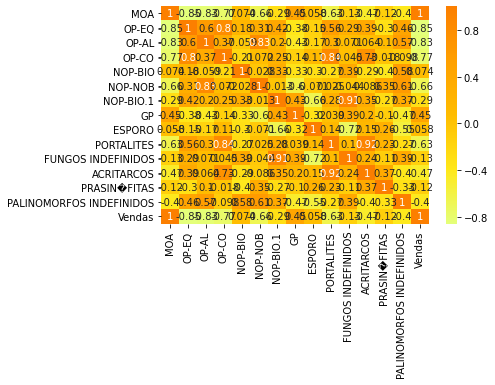

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(original.corr(), annot=True, cmap="Wistia")
plt.show()

# outra forma de ver a mesma análise
# sns.pairplot(tabela)
# plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

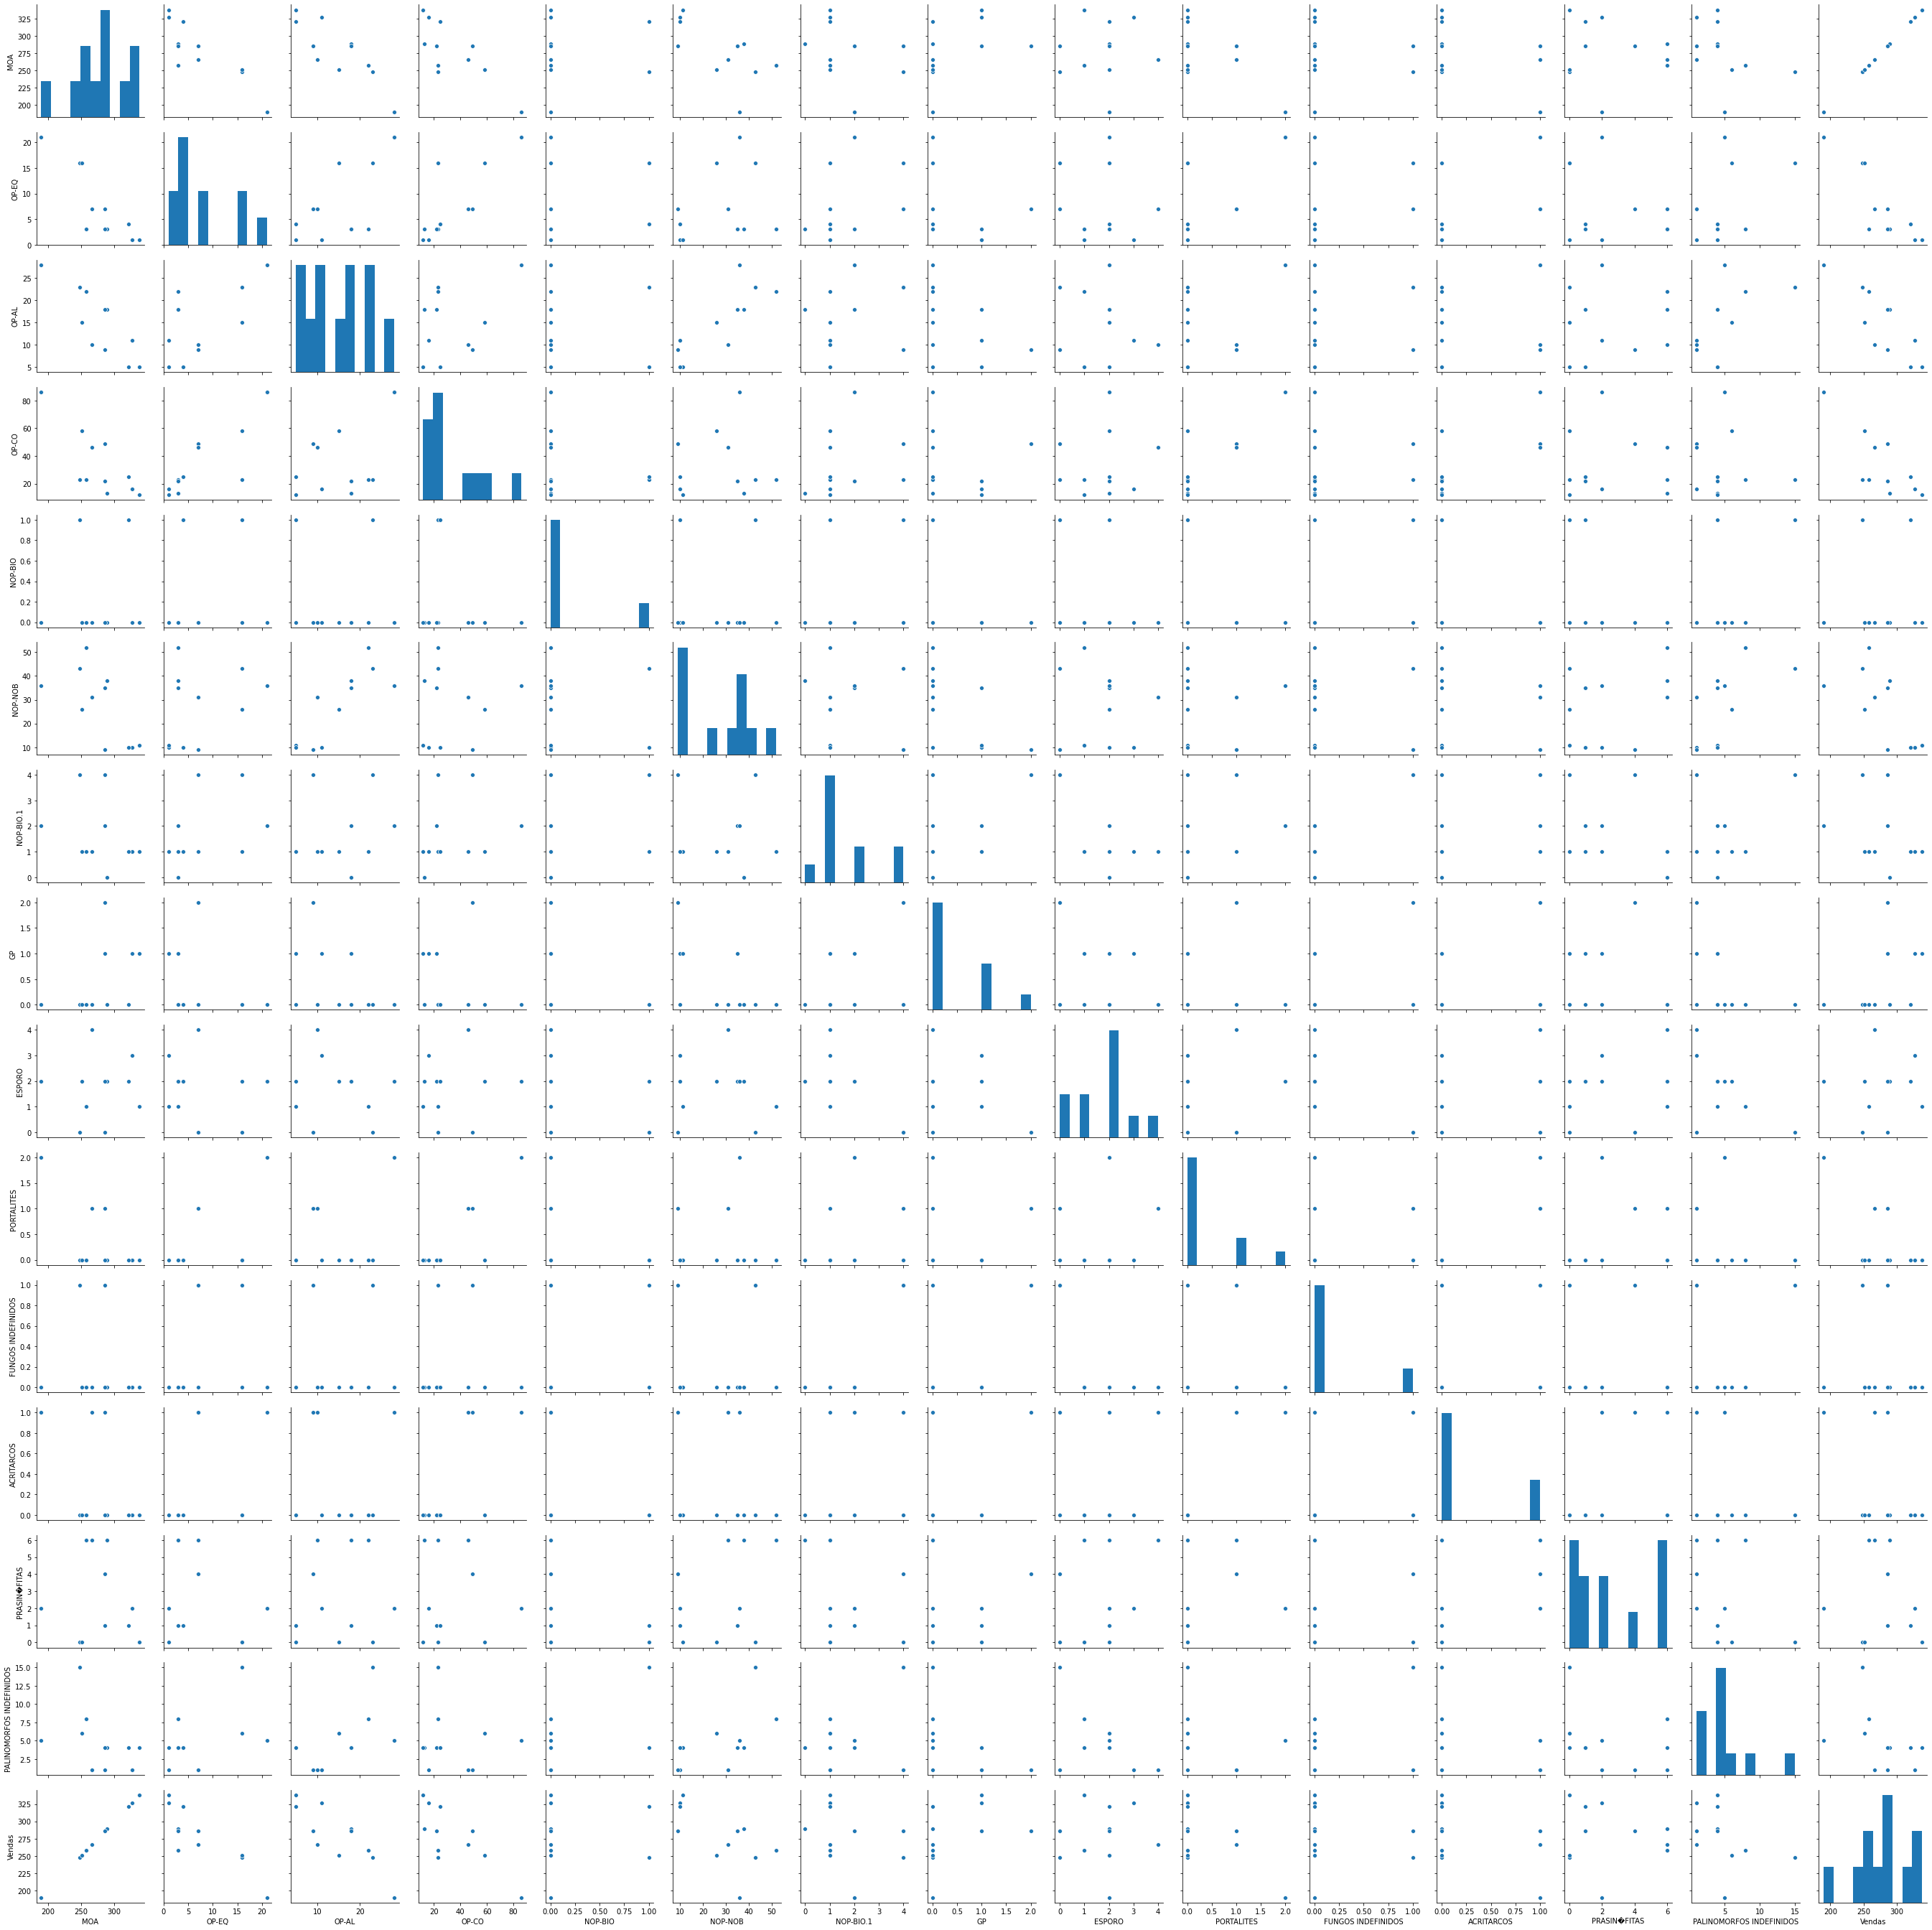

In [63]:
sns.pairplot(original)
plt.show

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [64]:
from sklearn.model_selection import train_test_split

x = original["x"]
y = original.drop("x", axis=1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)
- Arvore vai decidir novos valores com relação aos ja existentes na amostragem de dados 

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

ValueError: could not convert string to float: '3D'

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [ ]:
from sklearn import metrics

# criar as previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# comparar os modelos
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))  

#### Visualização Gráfica das Previsões

In [ ]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Como fazer uma nova previsao?

In [ ]:
# Como fazer uma nova previsao
# importar a nova_tabela com o pandas ()
# previsao = modelo_randomforest.predict(nova_tabela)
# print(previsao)
nova_tabela = pd.read_csv("novos.csv")
display(nova_tabela)
previsao = modelo_arvoredecisao.predict(nova_tabela)
print(previsao)

#### Qual a importância de cada variável para os dados de MOA?

In [ ]:
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()

# Caso queira comparar MOA e GeoQUIM
# print(df[["MOA", "QUIM"]].sum())